# Step 1 : load dataset and library

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_excel("Sample_Sales_Data.xlsx")
df.head(),df.info(),df.describe() # Checking the data





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  120 non-null    datetime64[ns]
 1   Region     120 non-null    object        
 2   Product    120 non-null    object        
 3   Quantity   120 non-null    int64         
 4   Sales      120 non-null    int64         
 5   Profit     120 non-null    int64         
 6   Customer   120 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 6.7+ KB


(   OrderDate Region Product  Quantity  Sales  Profit Customer
 0 2024-01-02  South  Laptop         1  10237    6488     Ravi
 1 2024-01-03  North  Laptop         4  59240    7165     Amit
 2 2024-01-08  North  Camera         5  37635   13338    Nisha
 3 2024-01-08   West  Laptop         8  78744   13240    Kiran
 4 2024-01-12  North      TV         5  22429    3647   Ramesh,
 None,
                  OrderDate    Quantity         Sales        Profit
 count                  120  120.000000    120.000000    120.000000
 mean   2024-05-27 11:12:00    4.775000  43053.283333   8011.133333
 min    2024-01-02 00:00:00    1.000000   5301.000000    912.000000
 25%    2024-03-14 06:00:00    2.750000  22909.750000   4559.250000
 50%    2024-05-25 12:00:00    4.000000  45791.000000   8127.500000
 75%    2024-08-21 00:00:00    7.000000  60648.250000  11528.000000
 max    2024-10-25 00:00:00    9.000000  79740.000000  14569.000000
 std                    NaN    2.711515  22724.099184   3926.075535)

In [43]:
# convert data column to datetime
df["OrderDate"]=pd.to_datetime(df["OrderDate"])

# extract month and year from order date
df["month"]=df["OrderDate"].dt.strftime("%b")# extract month name
df["year"]=df["OrderDate"].dt.strftime("%Y")# extract year

# sort by month order
month_order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df["month"]=pd.Categorical(df["month"],categories=month_order,ordered=True) #sort month in calender order

## step 2: monthly sales trend

C:\Users\91935\AppData\Local\Temp\ipykernel_21804\2673442293.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month')['Sales'].sum().reindex(month_order)  # use correct column name 'month' (lowercase)
c:\Users\91935\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


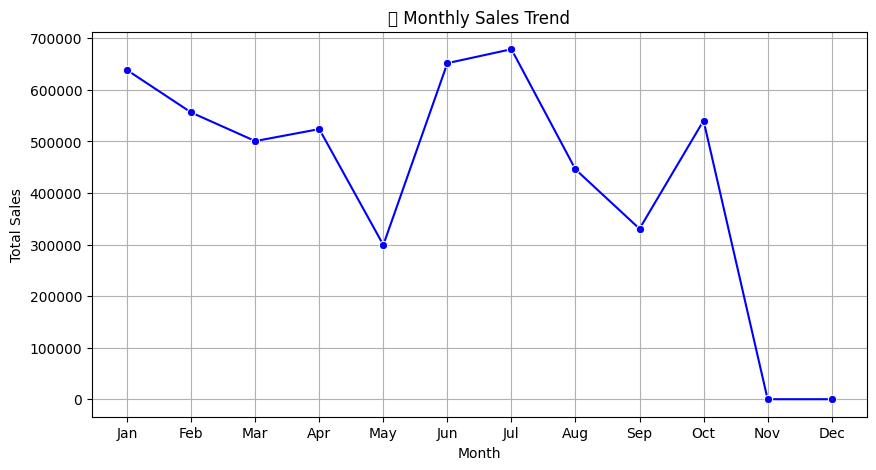

In [50]:
monthly_sales = df.groupby('month')['Sales'].sum().reindex(month_order)  
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## step 3: top 5 products

C:\Users\91935\AppData\Local\Temp\ipykernel_21804\1548616935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


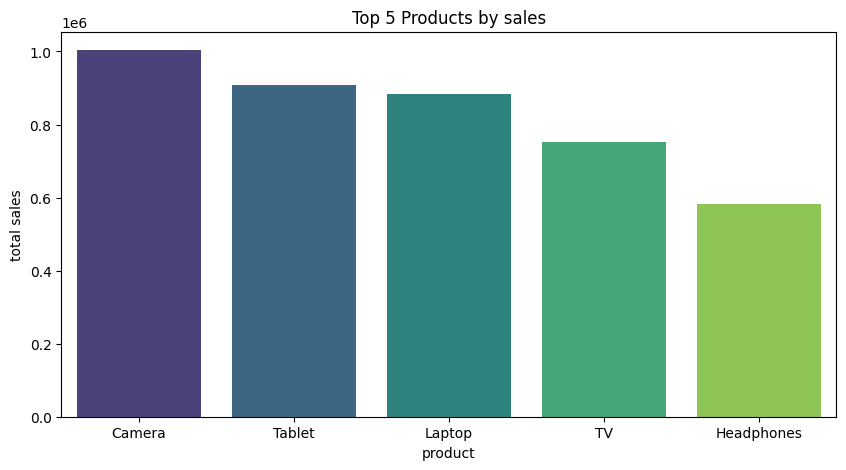

In [53]:
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)  
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 5 Products by sales")
plt.xlabel("product")
plt.ylabel("total sales")
plt.show()


## step 4: Regional sales distribution

C:\Users\91935\AppData\Local\Temp\ipykernel_21804\4033114910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Region", y ="Sales", data=df, palette="magma", estimator=sum)


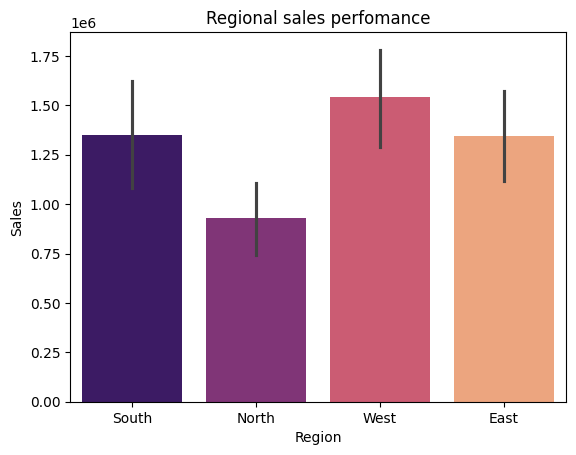

In [56]:
plt.Figure(figsize=(10,5))
sns.barplot(x= "Region", y ="Sales", data=df, palette="magma", estimator=sum)
plt.title("Regional sales perfomance")
plt.show()

## step 5 : profit and sales


C:\Users\91935\AppData\Local\Temp\ipykernel_21804\2391885546.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = "Sales", y = "Profit", data= df, s = 100, palette="tab10")


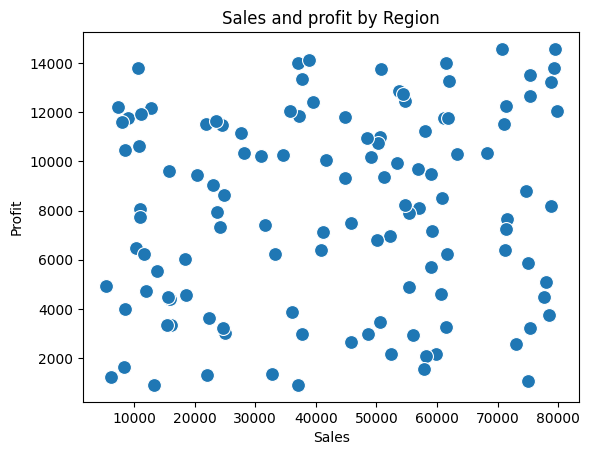

In [60]:
plt.Figure(figsize=(10,5))
sns.scatterplot(x = "Sales", y = "Profit", data= df, s = 100, palette="tab10")
plt.title("Sales and profit by Region")
plt.show()

## step 6: KEY insights

In [65]:
total_sales=df["Sales"].sum()
total_profit=df["Profit"].sum()
top_region= df.groupby("Region")["Sales"].sum().idxmax()
best_product= df.groupby("Product")["Sales"].sum().idxmax()


print("---SALES DASHBOARD SUMMRY---")
print(f"Total Sales: ₹{total_sales:,.0f}")
print(f"Total Profit: ₹{total_profit:,.0f}")
print(f"Top Region: {top_region}")
print(f"Best Selling Product: {best_product}")

---SALES DASHBOARD SUMMRY---
Total Sales: ₹5,166,394
Total Profit: ₹961,336
Top Region: West
Best Selling Product: Camera
